In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [7]:

"""
Class
"""
class NN():
    def load_planar_dataset(self):
        np.random.seed(1)
        m = 400 # number of examples
        N = int(m/2) # number of points per class
        D = 2 # dimensionality
        X = np.zeros((m,D)) # data matrix where each row is a single example
        Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
        a = 4 # maximum ray of the flower
    
        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            Y[ix] = j
            
        X = X.T
        Y = Y.T
    
        return X, Y
    def load_extra_datasets(self):  
        N = 200
        noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
        noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
        blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
        gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
        no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
        
        return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
    def load_other_datasets(self):
        # Datasets
        noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = self.load_extra_datasets()
        
        datasets = {"noisy_circles": noisy_circles,
                    "noisy_moons": noisy_moons,
                    "blobs": blobs,
                    "gaussian_quantiles": gaussian_quantiles}
        
        ### START CODE HERE ### (choose your dataset)
        dataset = "gaussian_quantiles"
        ### END CODE HERE ###
        
        X, Y = datasets[dataset]
        X, Y = X.T, Y.reshape(1, Y.shape[0])
        
        # make blobs binary
        if dataset == "blobs":
            Y = Y%2
        
        
        return X,Y
        
    def plot_decision_boundary(self, model, X, y):
        # Set min and max values and give it some padding
        x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
        y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole grid
        Z = model(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)
    def sigmoid(self, x):
        return 1/(1+np.exp(-x));
    def layer_sizes(self, X, Y):
        """
        Arguments:
        X -- input dataset of shape (input size, number of examples)
        Y -- labels of shape (output size, number of examples)
        
        Returns:
        n_x -- the size of the input layer
        n_h -- the size of the hidden layer
        n_y -- the size of the output layer
        """
        ### START CODE HERE ### (≈ 3 lines of code)
        n_x = X.shape[0] # size of input layer
        n_h = 4
        n_y = Y.shape[0] # size of output layer
        ### END CODE HERE ###
        return (n_x, n_h, n_y)
    # GRADED FUNCTION: initialize_parameters
    
    def initialize_parameters(self, n_x, n_h, n_y):
        """
        Argument:
        n_x -- size of the input layer
        n_h -- size of the hidden layer
        n_y -- size of the output layer
        
        Returns:
        params -- python dictionary containing your parameters:
                        W1 -- weight matrix of shape (n_h, n_x)
                        b1 -- bias vector of shape (n_h, 1)
                        W2 -- weight matrix of shape (n_y, n_h)
                        b2 -- bias vector of shape (n_y, 1)
        """
        
        np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
        
        ### START CODE HERE ### (≈ 4 lines of code)
        W1 = np.random.randn(n_h,n_x) * 0.01
        b1 = np.zeros((n_h,1))
        W2 = np.random.randn(n_y,n_h) * 0.01
        b2 = np.zeros((n_y,1))
        ### END CODE HERE ###
        
        assert (W1.shape == (n_h, n_x))
        assert (b1.shape == (n_h, 1))
        assert (W2.shape == (n_y, n_h))
        assert (b2.shape == (n_y, 1))
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}
        
        return parameters
    
    # GRADED FUNCTION: forward_propagation
    
    def forward_propagation(self, X, parameters):
        """
        Argument:
        X -- input data of size (n_x, m)
        parameters -- python dictionary containing your parameters (output of initialization function)
        
        Returns:
        A2 -- The sigmoid output of the second activation
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
        """
        # Retrieve each parameter from the dictionary "parameters"
        ### START CODE HERE ### (≈ 4 lines of code)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        ### END CODE HERE ###
        
        # Implement Forward Propagation to calculate A2 (probabilities)
        ### START CODE HERE ### (≈ 4 lines of code)
        Z1 = np.dot(W1,X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1) + b2
        A2 = self.sigmoid(Z2)
        ### END CODE HERE ###
        
        assert(A2.shape == (1, X.shape[1]))
        
        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "A2": A2}
        
        return A2, cache
    
    # GRADED FUNCTION: compute_cost
    
    def compute_cost(self, A2, Y, parameters):
        """
        Computes the cross-entropy cost given in equation (13)
        
        Arguments:
        A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        parameters -- python dictionary containing your parameters W1, b1, W2 and b2
        
        Returns:
        cost -- cross-entropy cost given equation (13)
        """
        
        m = Y.shape[1] # number of example
    
        # Compute the cross-entropy cost
        ### START CODE HERE ### (≈ 2 lines of code)
        logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log((1-A2)),(1-Y))
        cost = -(1/m)*np.sum(logprobs)
        ### END CODE HERE ###
        
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
        assert(isinstance(cost, float))
        
        return cost
    # GRADED FUNCTION: backward_propagation
    
    def backward_propagation(self, parameters, cache, X, Y):
        """
        Implement the backward propagation using the instructions above.
        
        Arguments:
        parameters -- python dictionary containing our parameters 
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
        X -- input data of shape (2, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        
        Returns:
        grads -- python dictionary containing your gradients with respect to different parameters
        """
        m = X.shape[1]
        
        # First, retrieve W1 and W2 from the dictionary "parameters".
        ### START CODE HERE ### (≈ 2 lines of code)
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        ### END CODE HERE ###
            
        # Retrieve also A1 and A2 from dictionary "cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1 = cache["A1"]
        A2 = cache["A2"]
        ### END CODE HERE ###
        
        # Backward propagation: calculate dW1, db1, dW2, db2. 
        ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
        dZ2 = A2 - Y
        dW2 = (1/m)*np.dot(dZ2,A1.T)
        db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
        dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
        dW1 = (1/m)*np.dot(dZ1,X.T)
        db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
        ### END CODE HERE ###
        
        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
        
        return grads
    # GRADED FUNCTION: update_parameters
    
    def update_parameters(self, parameters, grads, learning_rate = 1.2):
        """
        Updates parameters using the gradient descent update rule given above
        
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients 
        
        Returns:
        parameters -- python dictionary containing your updated parameters 
        """
        # Retrieve each parameter from the dictionary "parameters"
        ### START CODE HERE ### (≈ 4 lines of code)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        ### END CODE HERE ###
        
        # Retrieve each gradient from the dictionary "grads"
        ### START CODE HERE ### (≈ 4 lines of code)
        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        ## END CODE HERE ###
        
        # Update rule for each parameter
        ### START CODE HERE ### (≈ 4 lines of code)
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        ### END CODE HERE ###
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}
        
        return parameters   
    # GRADED FUNCTION: nn_model
    
    def nn_model(self, X, Y, n_h, num_iterations = 10000, print_cost=False):
        """
        Arguments:
        X -- dataset of shape (2, number of examples)
        Y -- labels of shape (1, number of examples)
        n_h -- size of the hidden layer
        num_iterations -- Number of iterations in gradient descent loop
        print_cost -- if True, print the cost every 1000 iterations
        
        Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
        """
        
        np.random.seed(3)
        n_x = self.layer_sizes(X, Y)[0]
        n_y = self.layer_sizes(X, Y)[2]
        
        # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
        ### START CODE HERE ### (≈ 5 lines of code)
        parameters = self.initialize_parameters(n_x, n_h, n_y)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        ### END CODE HERE ###
        
        # Loop (gradient descent)
    
        for i in range(0, num_iterations):
             
            ### START CODE HERE ### (≈ 4 lines of code)
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            A2, cache = self.forward_propagation(X, parameters)
            
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = self.compute_cost(A2, Y, parameters)
     
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            grads = self.backward_propagation(parameters, cache, X, Y)
     
            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
            parameters = self.update_parameters(parameters, grads)
            
            ### END CODE HERE ###
            
            # Print the cost every 1000 iterations
            if print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
    
        return parameters     
    # GRADED FUNCTION: predict
    
    def predict(self, parameters, X):
        """
        Using the learned parameters, predicts a class for each example in X
        
        Arguments:
        parameters -- python dictionary containing your parameters 
        X -- input data of size (n_x, m)
        
        Returns
        predictions -- vector of predictions of our model (red: 0 / blue: 1)
        """
        
        # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
        ### START CODE HERE ### (≈ 2 lines of code)
        A2, cache = self.forward_propagation(X, parameters)
        predictions = (A2 > 0.5)
        ### END CODE HERE ###
        
        return predictions

In [8]:
"""
Test cases
"""


class NNTestCase():
    def layer_sizes_test_case(self):
        np.random.seed(1)
        X_assess = np.random.randn(5, 3)
        Y_assess = np.random.randn(2, 3)
        return X_assess, Y_assess
    
    def initialize_parameters_test_case(self):
        n_x, n_h, n_y = 2, 4, 1
        return n_x, n_h, n_y
    
    
    def forward_propagation_test_case(self):
        np.random.seed(1)
        X_assess = np.random.randn(2, 3)
        b1 = np.random.randn(4,1)
        b2 = np.array([[ -1.3]])
    
        parameters = {'W1': np.array([[-0.00416758, -0.00056267],
            [-0.02136196,  0.01640271],
            [-0.01793436, -0.00841747],
            [ 0.00502881, -0.01245288]]),
         'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
         'b1': b1,
         'b2': b2}
    
        return X_assess, parameters
    
    def compute_cost_test_case(self):
        np.random.seed(1)
        Y_assess = (np.random.randn(1, 3) > 0)
        parameters = {'W1': np.array([[-0.00416758, -0.00056267],
            [-0.02136196,  0.01640271],
            [-0.01793436, -0.00841747],
            [ 0.00502881, -0.01245288]]),
         'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
         'b1': np.array([[ 0.],
            [ 0.],
            [ 0.],
            [ 0.]]),
         'b2': np.array([[ 0.]])}
    
        a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
        
        return a2, Y_assess, parameters
    
    def backward_propagation_test_case(self):
        np.random.seed(1)
        X_assess = np.random.randn(2, 3)
        Y_assess = (np.random.randn(1, 3) > 0)
        parameters = {'W1': np.array([[-0.00416758, -0.00056267],
            [-0.02136196,  0.01640271],
            [-0.01793436, -0.00841747],
            [ 0.00502881, -0.01245288]]),
         'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
         'b1': np.array([[ 0.],
            [ 0.],
            [ 0.],
            [ 0.]]),
         'b2': np.array([[ 0.]])}
    
        cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
             [-0.05225116,  0.02725659, -0.02646251],
             [-0.02009721,  0.0036869 ,  0.02883756],
             [ 0.02152675, -0.01385234,  0.02599885]]),
      'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
      'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
             [-0.05229879,  0.02726335, -0.02646869],
             [-0.02009991,  0.00368692,  0.02884556],
             [ 0.02153007, -0.01385322,  0.02600471]]),
      'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
        return parameters, cache, X_assess, Y_assess
    
    def update_parameters_test_case(self):
        parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
            [-0.02311792,  0.03137121],
            [-0.0169217 , -0.01752545],
            [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
            [  8.15562092e-06],
            [  6.04810633e-07],
            [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    
        grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
            [ 0.00082222, -0.00700776],
            [-0.00031831,  0.0028636 ],
            [-0.00092857,  0.00809933]]),
     'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
              -2.55715317e-03]]),
     'db1': np.array([[  1.05570087e-07],
            [ -3.81814487e-06],
            [ -1.90155145e-07],
            [  5.46467802e-07]]),
     'db2': np.array([[ -1.08923140e-05]])}
        return parameters, grads
    
    def nn_model_test_case(self):
        np.random.seed(1)
        X_assess = np.random.randn(2, 3)
        Y_assess = (np.random.randn(1, 3) > 0)
        return X_assess, Y_assess
    
    def predict_test_case(self):
        np.random.seed(1)
        X_assess = np.random.randn(2, 3)
        parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
            [-0.02311792,  0.03137121],
            [-0.0169217 , -0.01752545],
            [ 0.00935436, -0.05018221]]),
         'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
         'b1': np.array([[ -8.97523455e-07],
            [  8.15562092e-06],
            [  6.04810633e-07],
            [ -2.54560700e-06]]),
         'b2': np.array([[  9.14954378e-05]])}
        return parameters, X_assess

In [6]:
np.random.seed(1) 

__main__
(2, 400)
(1, 400)
(400,)


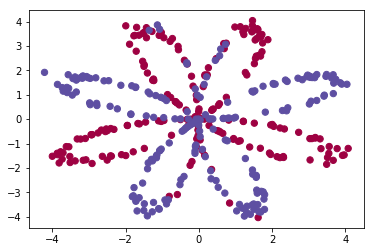

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!

===================linear_model plot



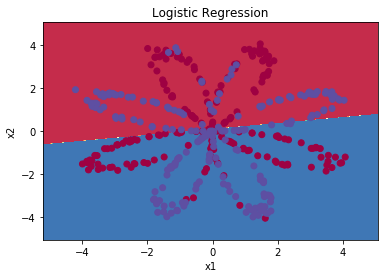


===================linear_model accuracy

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)

===================layer_sizes_test_case

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2

===================initialize_parameters

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]

===================forward_propagation

0.262818640198 0.091999045227 -1.30766601287 0.212877681719

===================compute_cost

cost = 0.693058761039

===================backward_propagation

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[

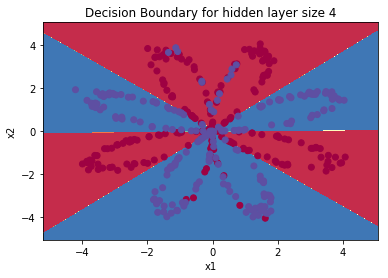


=================== training accuracy

Accuracy: 90%

=================== hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


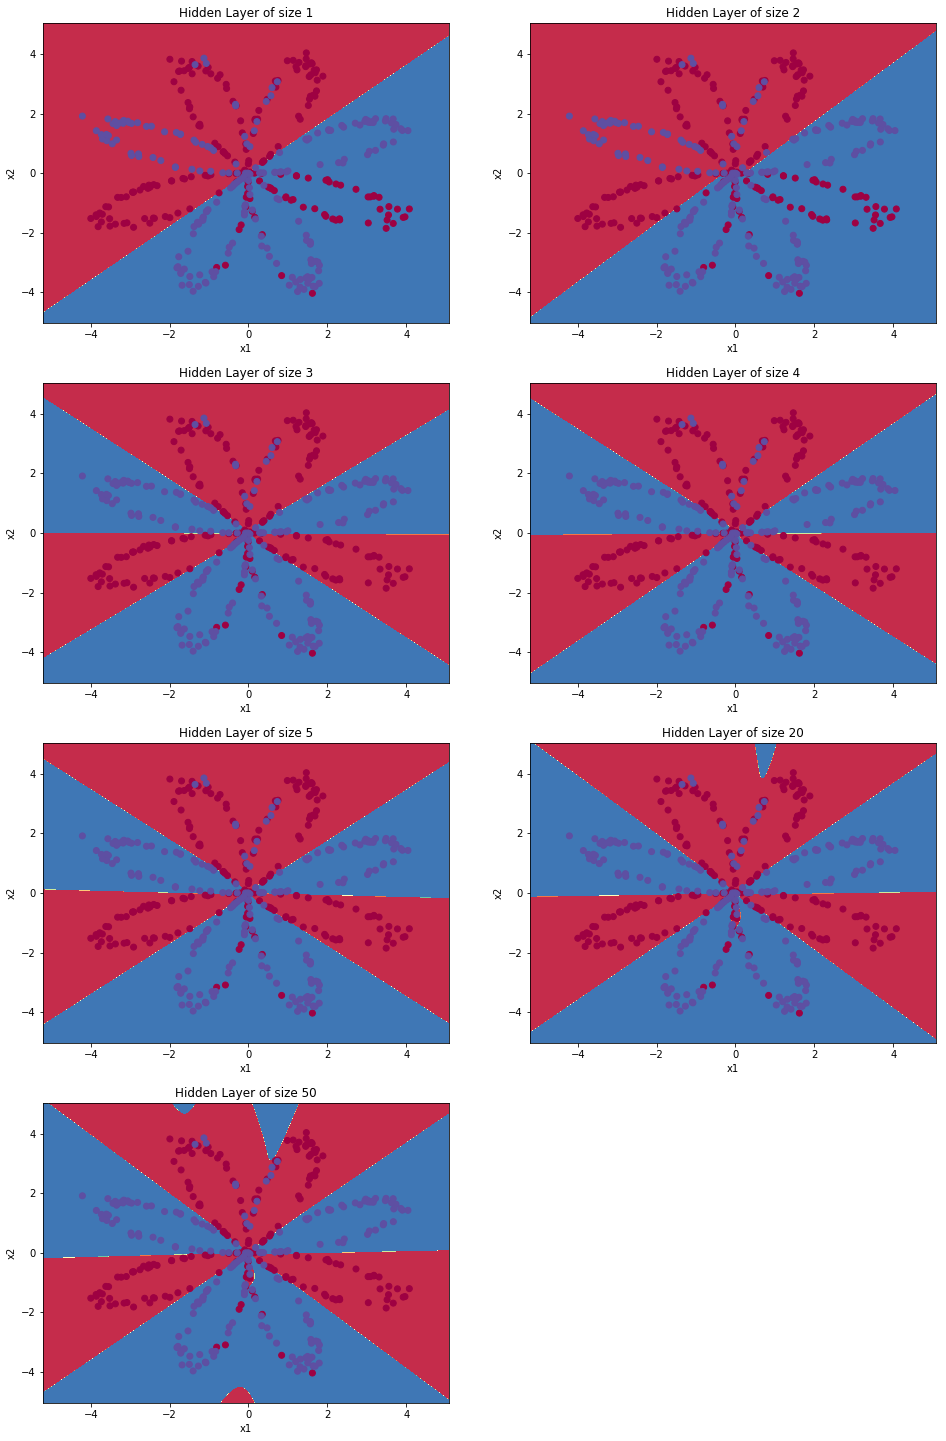

In [11]:
"""
Test
"""
print(__name__)
if __name__ == '__main__':
    np.random.seed(1) 
    nn = NN()
    nntc = NNTestCase()
    X, Y = nn.load_planar_dataset()
    print(X.shape)
    print(Y.shape)
    print(np.squeeze(Y).shape)
    # Visualize the data:
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral);
    plt.show()


    
    ### START CODE HERE ### (�� 3 lines of code)
    shape_X = X.shape
    shape_Y = Y.shape
    m = X.shape[1]  # training set size
    ### END CODE HERE ###
    
    print ('The shape of X is: ' + str(shape_X))
    print ('The shape of Y is: ' + str(shape_Y))
    print ('I have m = %d training examples!' % (m))
    
    print("\n===================linear_model plot\n")
    # Train the logistic regression classifier
    clf = sklearn.linear_model.LogisticRegressionCV();
    clf.fit(X.T, np.ravel(Y.T));
    # Plot the decision boundary for logistic regression
    nn.plot_decision_boundary(lambda x: clf.predict(x), X, np.squeeze(Y))
    plt.title("Logistic Regression")
    plt.show()

    print("\n===================linear_model accuracy\n")
    # Print accuracy
    LR_predictions = clf.predict(X.T)
    print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")
    
    
    print("\n===================layer_sizes_test_case\n")
    X_assess, Y_assess = nntc.layer_sizes_test_case()
    (n_x, n_h, n_y) = nn.layer_sizes(X_assess, Y_assess)
    print("The size of the input layer is: n_x = " + str(n_x))
    print("The size of the hidden layer is: n_h = " + str(n_h))
    print("The size of the output layer is: n_y = " + str(n_y))
    
    print("\n===================initialize_parameters\n")
    n_x, n_h, n_y = nntc.initialize_parameters_test_case()

    parameters = nn.initialize_parameters(n_x, n_h, n_y)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    
    
    print("\n===================forward_propagation\n")
    X_assess, parameters = nntc.forward_propagation_test_case()
    A2, cache = nn.forward_propagation(X_assess, parameters)
    
    # Note: we use the mean here just to make sure that your output matches ours. 
    print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))
    
    print("\n===================compute_cost\n")
    A2, Y_assess, parameters = nntc.compute_cost_test_case()
    
    print("cost = " + str(nn.compute_cost(A2, Y_assess, parameters)))
    
    print("\n===================backward_propagation\n")
    parameters, cache, X_assess, Y_assess = nntc.backward_propagation_test_case()
    
    grads = nn.backward_propagation(parameters, cache, X_assess, Y_assess)
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dW2 = "+ str(grads["dW2"]))
    print ("db2 = "+ str(grads["db2"]))    
    
    print("\n===================update_parameters\n")
    parameters, grads = nntc.update_parameters_test_case()
    parameters = nn.update_parameters(parameters, grads)
    
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    
    print("\n===================nn_model\n")
    X_assess, Y_assess = nntc.nn_model_test_case()
    parameters = nn.nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    
    print("\n===================nn_model\n")
    parameters, X_assess = nntc.predict_test_case()

    predictions = nn.predict(parameters, X_assess)
    print("predictions mean = " + str(np.mean(predictions)))
    
    print("\n===================nn_model training set\n")
    # Build a model with a n_h-dimensional hidden layer
    parameters = nn.nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
    
    # Plot the decision boundary
    nn.plot_decision_boundary(lambda x: nn.predict(parameters, x.T), X, Y)
    plt.title("Decision Boundary for hidden layer size " + str(4))
    plt.show()
    
    print("\n=================== training accuracy\n")
    # Print accuracy
    predictions = nn.predict(parameters, X)
    print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
    

    print("\n=================== hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]\n")
    # This may take about 2 minutes to run

    plt.figure(figsize=(16, 32))
    hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
    for i, n_h in enumerate(hidden_layer_sizes):
        plt.subplot(5, 2, i+1)
        plt.title('Hidden Layer of size %d' % n_h)
        parameters = nn.nn_model(X, Y, n_h, num_iterations = 5000)
        nn.plot_decision_boundary(lambda x: nn.predict(parameters, x.T), X, Y)
        predictions = nn.predict(parameters, X)
        accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
        print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))